# __Data standardization and data imputation for zero values__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
data = pd.read_csv(r"../Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

In [ ]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

# __Data cleaning operations__

In [ ]:
data.info()

Getting unique values from y data column:  
Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [ ]:
data["Classes  "].unique()

Apply `str.strip()` to clean the data:  
As we can see y data has some blank spaces so we need to remove then before use.  
I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [6]:
data["Classes  "] = data["Classes  "].str.strip()

In [8]:
data["Classes  "].unique()

array(['not fire', 'fire'], dtype=object)

Convert data type of all data column:  
In below code I am selecting all data which are intiger and making the column data type as float64

In [ ]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

I am converting Rain from numerical to categorical data.  
Reason is While analysing the data I found that rain has 52-56% zero values.  
  
And from EDA for rain, we can see where is rain change for fire is very less, 

So I am changing this dataset from numerical to categorical data.  
  
I will put `rain` if rain > 0 else `not rain`

In [10]:
data["Rain "] = data["Rain "].apply(lambda x: 'not rain' if x == 0 else 'rain')

# __Outlier handaling__

In [11]:
# mean is affected by outlier so i am using median for replasing outliers
floate_col = data.select_dtypes([np.number]).columns

In [ ]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


In [13]:
for i in floate_col:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    median = data[i].median()
    # data[i] = np.where(data[i]>upper,median,data[i])
    # data[i] = np.where(data[i]<lower,median,data[i])
    data[i] = data[i].apply(lambda x: median if (x < lower) | (x > upper) else x)

In [ ]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


# __Data standardization and data imputation for zero values__

## __data imputetion for zero values__

In [15]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

Count of zeros in column  Temperature  is :  0
Count of zeros in column   RH  is :  0
Count of zeros in column   Ws  is :  0
Count of zeros in column  FFMC  is :  0
Count of zeros in column  DMC  is :  0
Count of zeros in column  DC  is :  0
Count of zeros in column  ISI  is :  4
Count of zeros in column  BUI  is :  0
Count of zeros in column  FWI  is :  9


In [16]:
for i in floate_col:
    mean = data[i].mean()
    data[i] = data[i].apply(lambda x: mean if (x == 0) else x)

In [17]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

Count of zeros in column  Temperature  is :  0
Count of zeros in column   RH  is :  0
Count of zeros in column   Ws  is :  0
Count of zeros in column  FFMC  is :  0
Count of zeros in column  DMC  is :  0
Count of zeros in column  DC  is :  0
Count of zeros in column  ISI  is :  0
Count of zeros in column  BUI  is :  0
Count of zeros in column  FWI  is :  0


## __Appling Box-Cox on dataset to make is notmalize__  
Whether to apply the Box-Cox transformation before or after splitting the data into training and testing sets depends on the purpose of the transformation and the nature of your data.

If the purpose of the transformation is to normalize the data or to remove skewness, it is generally recommended to apply the transformation before splitting the data. This is because the Box-Cox transformation is a data-driven method that estimates the optimal transformation parameter based on the entire dataset, and applying it before splitting ensures that the same transformation is applied consistently to both the training and testing sets.

However, if the purpose of the transformation is to reduce the impact of outliers, it may be more appropriate to apply the transformation after splitting the data. This is because outliers in the training set can have a large influence on the estimated transformation parameter, which may result in overfitting to the training set and poor generalization performance on the testing set. In this case, it may be more appropriate to estimate the transformation parameter using only the training set, and then apply the same transformation to both the training and testing sets.

In general, it is important to carefully consider the purpose of the transformation and the characteristics of your data before deciding whether to apply the Box-Cox transformation before or after splitting the data.

In [18]:
from scipy.stats import boxcox
for i in floate_col[1:]:
    data[i],_ = boxcox(data[i])

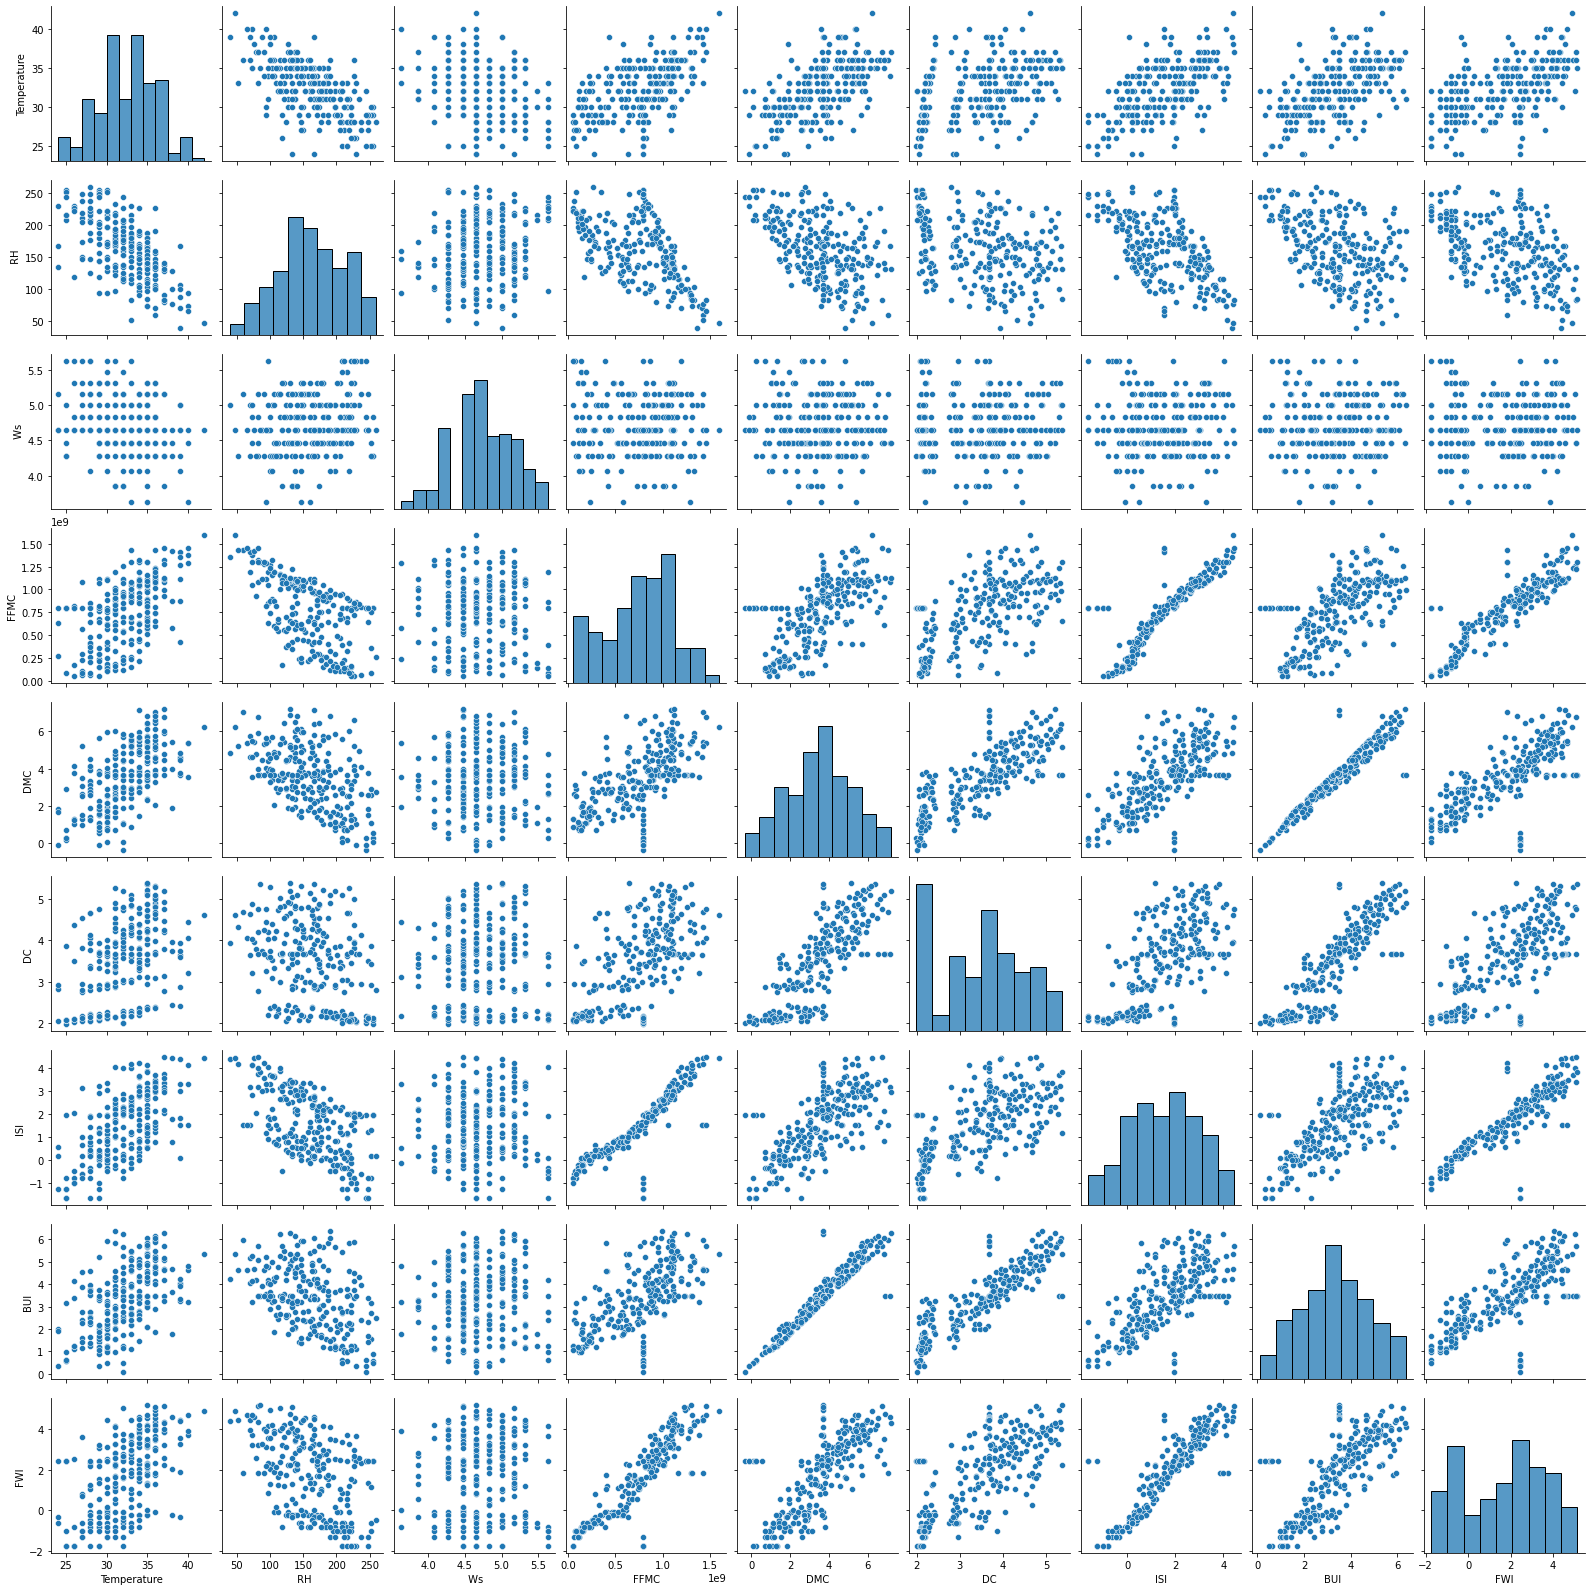

In [19]:
sns.pairplot(data)